<div style="width:100%; margin-left:auto; margin-right:auto;">
    <img src=./img/mackenzie_logo.png style="height:70px; float:left; margin-top:0px;"/>
    <img src=./img/intel_logo.png style="height:70px; float:right; margin-top:0px;"/>
</div>

<div style="margin-top:120px;">
    <h1 style="text-align:center;">AN INTRODUCTION TO MACHINE LEARNING WITH INTEL</h1>
</div>
<div style="margin-top:1px;">
    <h1 style="text-align:center;">TUTORIAL 2: Data Transformation</h1>
</div>

<div style="width:100%; margin-top:50px;">
    <p style="text-align:center;">Ana Carolina E. S. Lima, Rafael M. Santos, Calebe Bianchini, Leandro Nunes de Castro</p>
    <p style="text-align:center;">aceslima@gmail.com; santosrm@outlook.com.br; calebe.bianchini@mackenzie.br; lnunes@mackenzie.br</p>
    <p style="text-align:center;">Natural Computing and Machine Learning Laboratory (LCoN)</p>
    <p style="text-align:center;">Graduate Program in Electrical Engineering and Computing (PPGEEC)</p>
    <p style="text-align:center;">Mackenzie Presbiteryan University</p>
</div>

## Abstract

Once we read the data and work to prepare them for the next steps in the data mining process, we can move on to the transformation step. Our objective will be to analyze the database dimensionality and evaluate if it is possible to work in order to reduce the processing cost of the base. This paper is the second of four Tutorials dedicated to the introduction of Machine Learning. In this tutorial you will learn how to transform data in order to reduce dimensionality. We will show two methodologies: data compression and attribute selecion. 

# 1. The DAAL Transformation Step

In a standard knowledge discovery in databases (KDD) flow, the transformation process is usually part of the data pre-processing step, composed mainly of normalization and data reduction methods. As the former was already covered in the pre-processing step of the previous tutorial, in the transformation step here the discussion will focus on data reduction.


## 1.1 The Diabetes Dataset

Diabetes patient records were obtained from two sources: an automatic electronic recording device and paper records. The automatic device had an internal clock to timestamp events, whereas the paper records only provided "logical time" slots (breakfast, lunch, dinner, bedtime). For paper records, fixed times were assigned to breakfast (08:00), lunch (12:00), dinner (18:00), and bedtime (22:00). Thus paper records have fictitious uniform recording times whereas electronic records have more realistic time stamps. 

Source: Michael Kahn, MD, PhD, Washington University, St. Louis, MO (https://archive.ics.uci.edu/ml/datasets/diabetes)

The Code field is deciphered as follows: 

* 33 = Regular insulin dose 
* 34 = NPH insulin dose 
* 35 = UltraLente insulin dose 
* 48 = Unspecified blood glucose measurement 
* 57 = Unspecified blood glucose measurement 
* 58 = Pre-breakfast blood glucose measurement 
* 59 = Post-breakfast blood glucose measurement 
* 60 = Pre-lunch blood glucose measurement 
* 61 = Post-lunch blood glucose measurement 
* 62 = Pre-supper blood glucose measurement 
* 63 = Post-supper blood glucose measurement 
* 64 = Pre-snack blood glucose measurement 
* 65 = Hypoglycemic symptoms 
* 66 = Typical meal ingestion 
* 67 = More-than-usual meal ingestion 
* 68 = Less-than-usual meal ingestion 
* 69 = Typical exercise activity 
* 70 = More-than-usual exercise activity 
* 71 = Less-than-usual exercise activity 
* 72 = Unspecified special event

In [1]:
import numpy as np
from sklearn import datasets

dataset = datasets.load_diabetes()
print('Shape:', dataset.data.shape)

print('NaN values:', np.isnan(dataset.data).sum())
print('NaN values:', np.isnan(dataset.data).any())

Shape: (442, 10)
NaN values: 0
NaN values: False


## 1.2 Wine Quality

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, the reader should refer to the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant for a predictive analysis, so it is important to test some feature selection methods. 

Attribute Information (For more information, please refer to [Cortez et al., 2009]):

Input variables (based on physicochemical tests): 
* 1 - fixed acidity 
* 2 - volatile acidity 
* 3 - citric acid 
* 4 - residual sugar 
* 5 - chlorides 
* 6 - free sulfur dioxide 
* 7 - total sulfur dioxide 
* 8 - density 
* 9 - pH 
* 10 - sulphates 
* 11 - alcohol 

Output variable (based on sensory data): 
* 12 - quality (score between 0 and 1)

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 

In [2]:
import numpy as np
import pandas as pd

dataset_wine = pd.read_csv("./dataset/winequality-red.csv", delimiter=";")

# Does the dataset have missing values?
nan_count = dataset_wine.isnull().sum()
print(nan_count)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# 2. Data Reduction

It may be intuitive to think that the larger the number of objects and atributes in a data set, the more informative is the data for the data mining algorithm. However, large numbers of objects and attributes can make the available data sparse and the mathematical measures used in the analysis may become numerically unstable. Furthermore, a very large number of objects and attributes can make the processing of mining algorithms very complex, as well as the generated models.
In many cases, such as credit card fraud detection, customer profile identification at a large (e-commerce) retail store, social media data, etc., the data available for analysis is huge. Mining these data may require so much computational effort (space and processing time) that it becomes impractical. In such cases, data reduction techniques can be applied, both to reduce the number of objects in the data base and to reduce the number of attributes that describe them (dimensionality), as shown in Figure 1.

![Reduction in the number of objects and attributes](img/attr_reduction.png)
<p style="text-align:center;"><strong>Figure 1.</strong> Reduction in the number of objects ($O_i$) and attributes ($A_j$).</p>

It is important that the reduction methods maintain the integrity of the original data, that is, the mining of the reduced data should be more efficient, but not less effective. The main data reduction methods are:
* **Feature selection**: it accomplishes a dimensionality reduction in which irrelevant, insignificant or redundant attributes are detected and removed.
* **Data compression**: also reduces dimensionality, but employs algorithms for encoding or transforming data (attributes) rather than selection.
* **Reduction in the number of data**: in this method, data are removed, replaced or estimated by smaller (simpler) representations, such as parametric models (which store only model parameters instead of data) and non-parametric methods, such as grouping, sampling and histograms.
* **Discretization**: attribute values are replaced by higher conceptual levels or ranges, reducing the final number of attributes.

In this tutorial we will focus on feature selection, data compression and reduction in the number of data.


## 2.1 Feature Selection

The feature selection problem can be understood as follows: given a set of characteristics, select a subset using one of the following approaches:
* A subset of specific size that optimizes a given function;
* The smallest subset that satisfies some constraint relative to the evaluation measure;
* The subset with the best compromise between its size and a given measurement measure.

The feature selection problem can be formalized as follows. Let A be the original (complete) set of features with size $|A| = m$. The feature selection problem can be understood as a search task in a search space. Therefore, it is assumed that for each data set there is a subset $A*, A* \subseteq A$, which better caracterizes the data.

The problem can then be stated as follows. Let $J(A*)$ be an evaluation measure to be optimized, defined as $J : A* \subseteq A \longrightarrow \Re$. Let us assume the general maximization case. The selection of a subset of characteristics must take into account three factors: 
* Define $|A*| = n < m$. Find $A* \subset A$, such that $J(A*)$ is maximal.
* Define a value $J_0$, that is, the smallest accepted value for $J$. Find $A*\subseteq A$ with the smallest $|A*|$, such that $J(A*) \geq J_0$.
* Find a compromise between the smallest $|A*|$ and the largest $J(A*)$.

There are several feature selection methods in the literature, and this section reviews two common ones: mutual information and $\chi^2$.


### 2.1.1 Mutual Information

The mutual information is a criterion normally used in the statistical modelling of language and other applications. Let us take the confusion matrix of an attribute $a$ and a class $e$, where $M$ is the number of times with which $a$ and $e$ co-occur, $O$ is the number of times with which $a$ occurs without $e$, $P$ is the number of times $e$ occurs without $a$, and $N$ is the total number of objects in the dataset:
![matrix](img/matrix.png)

The mutual information between $a$ and $e$ is defined as:

$$ I(a,e) = \log \frac{Pr(a \wedge e)}{Pr(a) . Pr(e)} $$

And can be estimated by:

$$ I(a,e) \approx \log \frac{M.N}{(M+P).(M+O)} $$

The mutual information $I(a, e)$ has a zero natural value if $a$ and $e$ are independent.
To measure the quality of a characteristic in a global set of characteristics, it is necessary to combine the scores of each characteristic:

$$ I_{avg}(a) = \sum^m_{i=1}Pr(e_i) . I(a,e_i) $$

$$ I_{max}(a) = max^m_{i=1}\{(I(a,e_i)\}$$

Equivalently, the mutual information can be calculated using the marginal probabilities:

$$I(a,e) = log Pr(a|e) - log Pr(a)$$


In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn import datasets
import pandas as pd


dataset_wine = pd.read_csv("./dataset/winequality-red.csv", delimiter=";")
data = dataset_wine[dataset_wine.columns[:-1]]
target = dataset_wine["quality"]

# k features to be selected 
model = SelectKBest(mutual_info_classif, k=5)
dataset_new = model.fit_transform(data, target)

feature_names = data.columns
scores = model.scores_

dataframe = pd.DataFrame([feature_names, scores], index=["attributes", "scores"])
print(dataframe.T)

indices = model.get_support(indices=True)

feature_names = [feature_names[i] for i
                         in model.get_support(indices=True)]

print(feature_names)


              attributes     scores
0          fixed acidity  0.0631315
1       volatile acidity   0.106163
2            citric acid  0.0899414
3         residual sugar  0.0407251
4              chlorides  0.0166583
5    free sulfur dioxide  0.0267993
6   total sulfur dioxide  0.0639951
7                density  0.0823069
8                     pH          0
9              sulphates    0.10095
10               alcohol   0.196984
['volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol']


### 2.1.2 $\chi^2$

The $\chi^2$ statistics measures the absence of independence between an attribute $a$ and a class $e$ (which is another attribute) and can be compared to the distribution $\chi^2$ with a degree of freedom to judge extreme values.
Let us assume the same confusion matrix of an attribute $a$ and a class $e$, where $M$ is the number of times $a$ and $e$ co-occur, $O$ is the number of times it occurs without $e$, $P$ is the number of times $e$ occurs without $a$, $Q$ is the number of times no co-occurrence occurs, and $N$ is the total number of objects in the database.
The quality of the term measured by the $\chi^2$ criterion is given by:

$$ \chi^2(a,e) = \frac{N.(M.Q - O.P)^2}{(M+P).(O+Q).(M+O).(P+Q)}$$

The $\chi^2$ statistic has a natural value equal to zero if the variables $a$ and $e$ are independent.

The use of $\chi^2$ statistics for feature selection works as follows:
* Calculate the $\chi^2$ statistic value for each pair of characteristics (or between each characteristic and a class variable).
* To measure the quality of a characteristic in a global set of characteristics it is necessary to combine the scores of each characteristic:

$$ \chi^2_{avg}(a) = \sum^m_{i=1}Pr(e_i) . \chi^2(a, e)$$
$$ \chi^2_{max}(a) = max^m_{i=1}\{\chi^2(a,e)\}$$


In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import datasets
import pandas as pd

dataset_wine = pd.read_csv("./dataset/winequality-red.csv", delimiter=";")
data = dataset_wine[dataset_wine.columns[:-1]]
target = dataset_wine["quality"]

# k features to be selected 
model = SelectKBest(chi2, k=5)
dataset_new = model.fit_transform(data, target)

feature_names = data.columns
scores = model.scores_

dataframe = pd.DataFrame([feature_names, scores], index=["attributes", "scores"])
print(dataframe.T)

indices = model.get_support(indices=True)

feature_names = [feature_names[i] for i
                         in model.get_support(indices=True)]

print(feature_names)

              attributes       scores
0          fixed acidity      11.2607
1       volatile acidity      15.5803
2            citric acid      13.0257
3         residual sugar      4.12329
4              chlorides     0.752426
5    free sulfur dioxide      161.936
6   total sulfur dioxide      2755.56
7                density  0.000230432
8                     pH     0.154655
9              sulphates      4.55849
10               alcohol      46.4299
['volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']


## 2.2 Data (Feature) Compression

Data compression techniques apply an encoding or transformation to the data so that a compact representation of the original data is obtained. If the original data can be reconstructed from the compressed data without loss of information, then we say that the compression method is without loss, otherwise we say it is lossy.

Principal Component Analysis (PCA), one of the most useful and effective methods in data compression, is a statistical procedure that converts a set of objects with possibly correlated attributes into a set of linearly uncorrelated attributes, called *principal components*. The number of principal components is less than or equal to the number of attributes in the data set, and the transformation is defined so that the first main component has the largest variance (i.e., represents the greatest variability of the data), the second main component has the second largest variance, and so on.

Principal component analysis is the main linear technique for data dimensionality reduction. It performs a linear mapping (also called projection) of the data in a smaller dimension space, so that the variance of the data in that space is maximized. In practice, the data covariance matrix is constructed and its eigenvectors are calculated. The eigenvectors that correspond to the largest eigenvalues (the major components) can be used to reconstruct a large fraction of the variance of the original data. In this case, the original space with dimension equal to the number of attributes was reduced, with loss, to the space generated by a pre-defined number of eigenvectors.
The use of PCA to reduce dimensionality implies the retention of those characteristics of the data that contribute most to its variance.
Let $ X \in \Re ^{nxm}  $ be the original dataset with $n$ objects of dimension $m$ each, and $c$ the desired reduced dimension for the new dataset $ Y (Y \in \Re ^{nxc})  $. The standard PCA procedure for dimensionality reduction is:

* Normalize the input data, so that all attributes belong to the same range.
* Calculate the covariance matrix, its eigenvalues and eigenvectors.
* Sort the eigenvalues in descending order and choose a number $c$ of main components (eigenvectors) according to their eigenvalues. The main components essentially serve as a new set of axes for the data, providing important information about their variance.
* Calculate the new data matrix $Y$ as follows: $Y = A.V$, where $V$ is the matrix containing, in its columns, the first $c$ eigenvectors selected, $V \in \Re ^{mxc}$. The result of this product is a matrix $Y \in \Re ^{nxc}$ with the transformed database, containing $n$ objects represented by the set of attributes $c$.


## 2.3 Reduction in the Number of Data

As shown in Table 1, the data reduction can affect both the attributes (features) and the objects, that is, it is possible to reduce the dimensionality of the objects and/or the number of objects in the dataset. 
The process called sampling aims to select a subset of objects that is representative of all the dataset for the purposes of analysis. The main steps of sampling are: define the sampling method to be used; set the sample size; and sample.
Let us assume a database with N objects. The main sampling methods are:

* **Random sampling without replacement**: a sample with $n$ distinct objects $(n < N)$ randomly chosen from the database.
* **Random sampling with replacement**: similar to the previous case, but each object taken from the database is stored and returned to the database, so that it can be selected again.
* **Systematic sampling**: it consists of organizing the database following some criterion, for example, from the lowest to the highest value of some attribute of the object or the oldest object to the newest one, and to select objects in a systematic way - for example, objects whose indices are even or just the objects generated in the current year.
* **Sampling by group**: if a database is grouped in $M$ disjoint groups, then $m$ groups $(m < M)$ can be chosen randomly.
* **Stratified sampling**: if the database is divided into groups or classes, then in stratified sampling the data proportion of each class is maintained.

An advantage of sampling is that its computational cost is proportional to $n$, that is, the size of the sample to be taken from the database and, therefore, is sublinear with respect to the size $N$ of the database. The main disadvantage of the method is the possible mining tool error due to sampling.


##### Using the PCA Algorithm in DAAL 

In [5]:
import numpy as np
from daal.data_management import HomogenNumericTable, BlockDescriptor, BlockDescriptor_Float64, readOnly

def getArrayFromNT(table, nrows=0):
    bd = BlockDescriptor()
    if nrows == 0:
        nrows = table.getNumberOfRows()
    table.getBlockOfRows(0, nrows, readOnly, bd)
    npa = np.copy(bd.getArray())
    table.releaseBlockOfRows(bd)
    return npa

[[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]
 [-0.04437151  0.38654811  0.15628061  0.13825564 -0.57302669 -0.45593985
  -0.50624287  0.06818423  0.0261893   0.0849466 ]
 [-0.49466811  0.10685833 -0.1675317  -0.51356804  0.0685867   0.26969438
  -0.38602787  0.38068121 -0.0636315  -0.27684271]
 [ 0.4140095   0.67986052 -0.49982533  0.01966734  0.06839533  0.16777384
   0.07602005 -0.0079212  -0.26442742 -0.08708624]
 [ 0.68686389 -0.37345612 -0.12935936 -0.48689014 -0.12917415 -0.11673143
  -0.24499115  0.14364377  0.1516611  -0.03138792]
 [-0.2258505   0.04173103 -0.4031419  -0.27276274  0.00540864 -0.1332572
   0.1063716  -0.0339454   0.17873005  0.80506447]
 [ 0.10953821  0.06760551  0.51985787 -0.32064908 -0.07364908  0.23054011
   0.00753445 -0.07123619 -0.64731345  0.35727279]
 [-0.01493468 -0.44293966 -0.39294187  0.47736435 -0.12941351  0.19131121
  -0.32463641  0.18058834 -0.44966002  0.1666087 ]
 

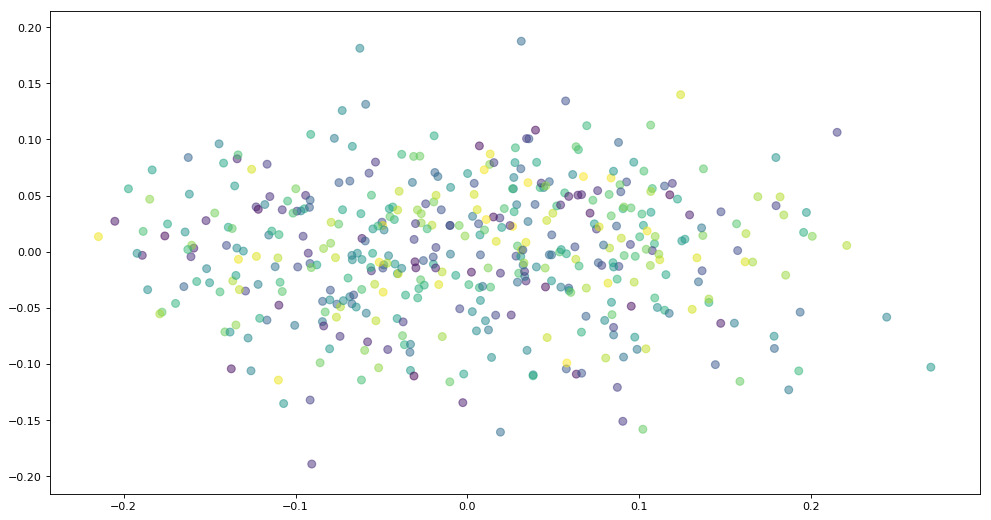

In [6]:
# Import the necessary packages and functions
from daal.data_management import HomogenNumericTable
import daal.algorithms.pca as pca
from sklearn import datasets
import matplotlib.pyplot as plt

# 1 - Load a dataset (Diabetes dataset)
dataset = datasets.load_diabetes()
# 2 - In this case, we need to transform in HomogenNumericTable
data = np.ascontiguousarray(dataset.data)
data = HomogenNumericTable(data)

# Create an algorithm object for PCA using:
# the correlation method (Batch_Float64CorrelationDense) 
# or single value decomposition method (Batch_Float64SvdDense)
pca_alg = pca.Batch_Float64SvdDense()

# Set the input for the algorithm
pca_alg.input.setDataset(pca.data, data)

# Compute the result
result = pca_alg.compute()

# The results can be retrieved using the following commands:
eigenvalues = result.get(pca.eigenvalues)
eigenvectors = result.get(pca.eigenvectors)

loadings = getArrayFromNT(result.get(pca.eigenvectors))

print(loadings)

# Multiply the largest 2 eigenvectors with the original data
tra_reduced = np.dot(dataset.data, loadings[:2].T)

# Plot the dataset in two dimension
N = len(dataset.data) 
colors = np.random.rand(N)

plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(tra_reduced[:, 0], tra_reduced[:, 1], s=50, c=colors, alpha=0.5)
plt.show()

## References

- https://github.com/daaltces/pydaal-tutorials
- https://github.com/daaltces/pydaal-tutorials/blob/master/kmeans_example.ipynb
- https://software.intel.com/en-us/articles/improving-performance-with-the-intel-data-analytics-acceleration-library
- http://www.ime.unicamp.br/~wanderson/Aulas/Aula8/MT803_Aula8_Selecao_Atributos.pdf
- DE CASTRO, L. N.; FERRARI, D. G. (2016), An Introduction to Data Mining: Basic Concepts, Algorithms, and Applications, (in Portuguese), Saraiva